<a href="https://colab.research.google.com/github/himabindu-github/Hackbio-Oct25/blob/main/surprise_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         HBR_1  HBR_2  HBR_3  UHR_1  UHR_2  UHR_3
SULT4A1  375.0  343.6  339.4    3.5    6.9    2.6
MPPED1   157.8  158.4  162.6    0.7    3.0    2.6
PRAME      0.0    0.0    0.0  568.9  467.3  519.2
IGLC2      0.0    0.0    0.0  488.6  498.0  457.5
IGLC3      0.0    0.0    0.0  809.7  313.8  688.0
              HBR_1  HBR_2  HBR_3  UHR_1  UHR_2  UHR_3
IGLC2           0.0    0.0    0.0  488.6  498.0  457.5
IGLC3           0.0    0.0    0.0  809.7  313.8  688.0
CDC45           2.6    1.0    0.0  155.0  152.5  149.9
MPPED1        157.8  158.4  162.6    0.7    3.0    2.6
RP3-323A16.1    0.0    0.0    1.2   51.9   76.2   53.1


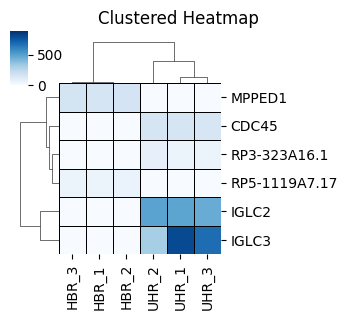

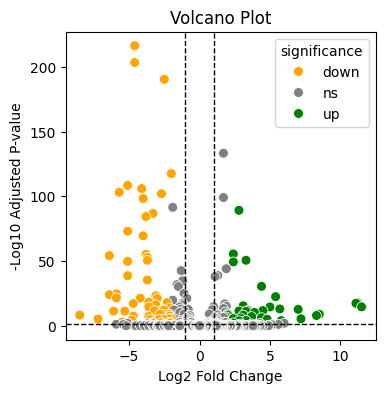

In [46]:
# Part A – Gene Expression Analysis
# datasets
   # a. Normalized counts for HBR vs UHR samples
   # b. Differential expression results (chromosome 22)

# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# urls for the datasets
csv_a_url = "https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/hbr_uhr_top_deg_normalized_counts.csv"
csv_b_url = "https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/hbr_uhr_deg_chr22_with_significance.csv"

# Read the csv files into  pandas data frames
df_a = pd.read_csv(csv_a_url, index_col = 0)
df_b = pd.read_csv(csv_b_url)

# Show first few rows
print(df_a.head())
print(df_b.head())


# Define target genes : to natch the figure to be reproduced
target_genes = ["IGLC2", "IGLC3", "CDC45", "MPPED1", "RP3-323A16.1", "RP5-1119A7.17"]
subset = df_a.loc[target_genes]
print(subset.head())

# a. Heatmap
sns.clustermap(subset, cmap="Blues", vmin=0, vmax=900, linewidths=0.5, linecolor="black", figsize=(3.5, 3))
plt.suptitle("Clustered Heatmap", y=1.05)
plt.show()


# b. Volcano Plot - Scatter plot: log2FC vs log10padj

plt.figure(figsize=(4,4))
sns.scatterplot(
    data=df_b,
    x="log2FoldChange",
    y="-log10PAdj",
    hue="significance",
    palette={"up":"green", "down":"orange", "ns":"grey"},  # map significance to colors
    legend=True,
    s=50
   )

# fold-change thresholds
plt.axvline(x=1, color='black', linestyle='--', lw=1)
plt.axvline(x=-1, color='black', linestyle='--', lw=1)

# significance threshold line
plt.axhline(y=-np.log10(0.05), color='black', linestyle='--', lw=1)

# Labels and title
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 Adjusted P-value")
plt.title("Volcano Plot")
plt.show()

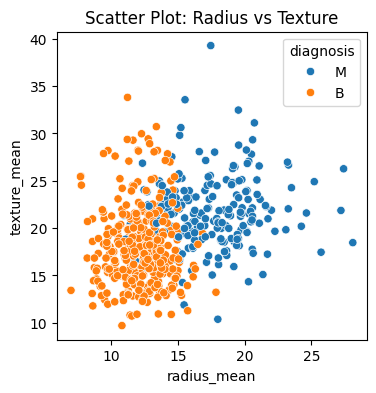

                 radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean         1.000000      0.323782        0.997855   0.987357   
texture_mean        0.323782      1.000000        0.329533   0.321086   
perimeter_mean      0.997855      0.329533        1.000000   0.986507   
area_mean           0.987357      0.321086        0.986507   1.000000   
smoothness_mean     0.170581     -0.023389        0.207278   0.177028   

                 smoothness_mean  compactness_mean  
radius_mean             0.170581          0.506124  
texture_mean           -0.023389          0.236702  
perimeter_mean          0.207278          0.556936  
area_mean               0.177028          0.498502  
smoothness_mean         1.000000          0.659123  


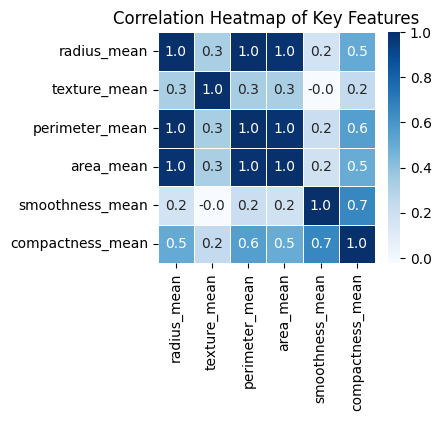

In [39]:
# Part B – Breast Cancer Data Exploration
# dataset:
# Breast Cancer Diagnostic Data (Correlation & Scatter/Density Plots)
# c–f. Breast Cancer Wisconsin dataset

# url for the dataset
breast_cancer_csv_url = "https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/data-3.csv"

# read the dataset from url
df_breast_cancer_wisc = pd.read_csv(breast_cancer_csv_url)
print(df_breast_cancer_wisc.head())


# 2 c. Scatter Plot (radius vs texture)
plt.figure(figsize = (4,4))
sns.scatterplot(data = df_breast_cancer_wisc,
                x = "radius_mean",
                y = "texture_mean",
                hue = "diagnosis")
plt.title("Scatter Plot: Radius vs Texture", fontsize=12)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.show()

# 2 d. Correlation Heatmap
# subset features to correlate
features = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean"]
df_features = df_breast_cancer_wisc[features]
print(df_features.head())

# compute the correlation matrix
correlation_matrix = df_features.corr()
print(correlation_matrix.head())

# plot heatmap
plt.figure(figsize=(3.5, 3))
sns.heatmap(
    correlation_matrix,
    annot=True,        # show correlation values
    cmap="Blues",   # color map (blue = negative, red = positive)
    fmt=".1f",         # format correlation numbers to 2 decimal places
    linewidths=0.5,    # add grid lines between cells
)
plt.title("Correlation Heatmap of Key Features", fontsize=12)
plt.show()


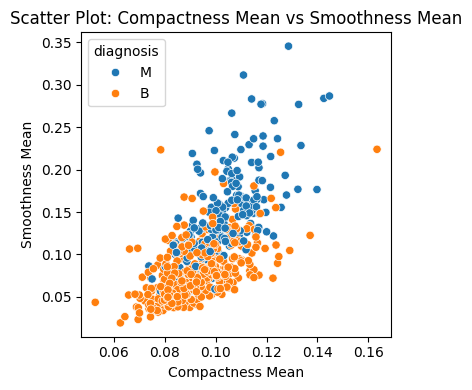

In [21]:
# e. Scatter Plot (smoothness vs compactness)
plt.figure(figsize = (4,4))
sns.scatterplot(data = df_breast_cancer_wisc,
                x = "smoothness_mean",
                y = "compactness_mean",
                hue = "diagnosis")
plt.title("Scatter Plot: Compactness Mean vs Smoothness Mean", fontsize=12)
plt.xlabel("compactness_mean")
plt.ylabel("smoothness_mean")
plt.tight_layout()
plt.show()

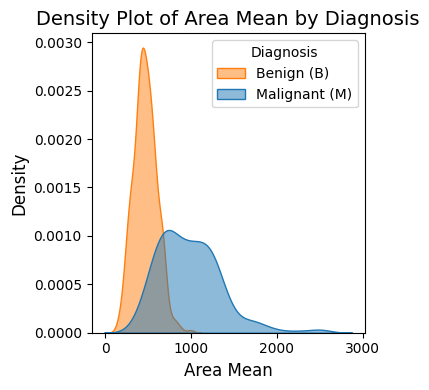

In [23]:
# f. Density Plot (area distribution)
  # KDE plot: to visualize the probability distribution of a continuous variable in a smooth, continuous curve
plt.figure(figsize=(4, 4))   # set figure size
sns.kdeplot(
    data=df_breast_cancer_wisc,
    x="area_mean",
    hue="diagnosis",       # separates M and B
    fill=True,             # fills under the KDE curve
    common_norm=False,     # keeps area under each curve independent
    alpha=0.5
)

# --- Labels and title ---
plt.title("Density Plot of Area Mean by Diagnosis", fontsize=14)
plt.xlabel("Area Mean", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Diagnosis", labels=["Benign (B)", "Malignant (M)"])
plt.tight_layout()
plt.show()